In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate example data (replace with actual data)
np.random.seed(42)
data_length = 1000
time_steps = 10
data = np.random.random(data_length)
data = np.cumsum(data)

# Create lagged sequences
X, y = [], []
for i in range(data_length - time_steps):
    X.append(data[i:i+time_steps])
    y.append(data[i+time_steps])

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Visualize predictions
plt.plot(data, label='Original Data')
plt.plot(range(time_steps, time_steps + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(time_steps + len(train_predict), data_length), test_predict, label='Test Predictions')
plt.legend()
plt.show()


Epoch 1/10


ValueError: ignored

Epoch 1/10
792/792 - 10s - loss: 0.0083 - 10s/epoch - 13ms/step
Epoch 2/10
792/792 - 6s - loss: 0.0019 - 6s/epoch - 7ms/step
Epoch 3/10
792/792 - 6s - loss: 0.0016 - 6s/epoch - 7ms/step
Epoch 4/10
792/792 - 5s - loss: 0.0014 - 5s/epoch - 6ms/step
Epoch 5/10
792/792 - 3s - loss: 0.0012 - 3s/epoch - 4ms/step
Epoch 6/10
792/792 - 3s - loss: 9.6678e-04 - 3s/epoch - 4ms/step
Epoch 7/10
792/792 - 4s - loss: 7.7592e-04 - 4s/epoch - 5ms/step
Epoch 8/10
792/792 - 4s - loss: 7.2804e-04 - 4s/epoch - 5ms/step
Epoch 9/10
792/792 - 3s - loss: 6.7173e-04 - 3s/epoch - 4ms/step
Epoch 10/10
792/792 - 3s - loss: 6.2649e-04 - 3s/epoch - 4ms/step
7/7 [==============================] - 0s 7ms/step
Train RMSE: 0.023724186914327428
Test RMSE: 0.07141415922015132


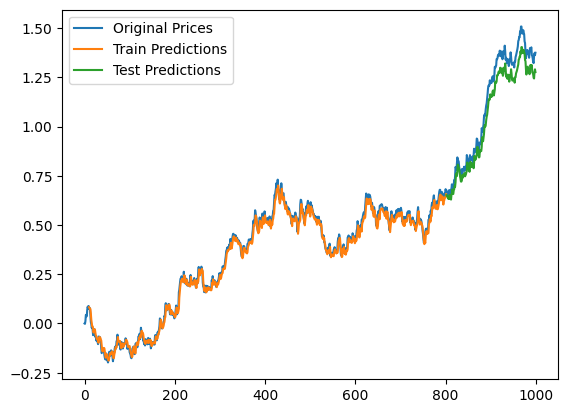

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate example data with realistic price movement
np.random.seed(42)
data_length = 1000
time_steps = 10

# Simulate price changes with some noise
price_changes = np.random.normal(0.001, 0.02, data_length)
price_changes[0] = 0  # Starting price
prices = np.cumsum(price_changes)

# Create lagged sequences
X, y = [], []
for i in range(data_length - time_steps):
    X.append(prices[i:i+time_steps])
    y.append(prices[i+time_steps])

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Visualize predictions
plt.plot(prices, label='Original Prices')
plt.plot(range(time_steps, time_steps + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(time_steps + len(train_predict), data_length), test_predict, label='Test Predictions')
plt.legend()
plt.show()


Epoch 1/10
792/792 - 9s - loss: 0.7391 - accuracy: 0.4962 - 9s/epoch - 11ms/step
Epoch 2/10
792/792 - 4s - loss: 0.7033 - accuracy: 0.4937 - 4s/epoch - 5ms/step
Epoch 3/10
792/792 - 3s - loss: 0.6983 - accuracy: 0.5215 - 3s/epoch - 4ms/step
Epoch 4/10
792/792 - 3s - loss: 0.6963 - accuracy: 0.5088 - 3s/epoch - 4ms/step
Epoch 5/10
792/792 - 4s - loss: 0.6974 - accuracy: 0.5076 - 4s/epoch - 5ms/step
Epoch 6/10
792/792 - 3s - loss: 0.6979 - accuracy: 0.4949 - 3s/epoch - 4ms/step
Epoch 7/10
792/792 - 3s - loss: 0.6959 - accuracy: 0.5227 - 3s/epoch - 4ms/step
Epoch 8/10
792/792 - 3s - loss: 0.6954 - accuracy: 0.5152 - 3s/epoch - 4ms/step
Epoch 9/10
792/792 - 4s - loss: 0.6956 - accuracy: 0.4962 - 4s/epoch - 5ms/step
Epoch 10/10
792/792 - 3s - loss: 0.6945 - accuracy: 0.5202 - 3s/epoch - 4ms/step
7/7 [==============================] - 1s 5ms/step


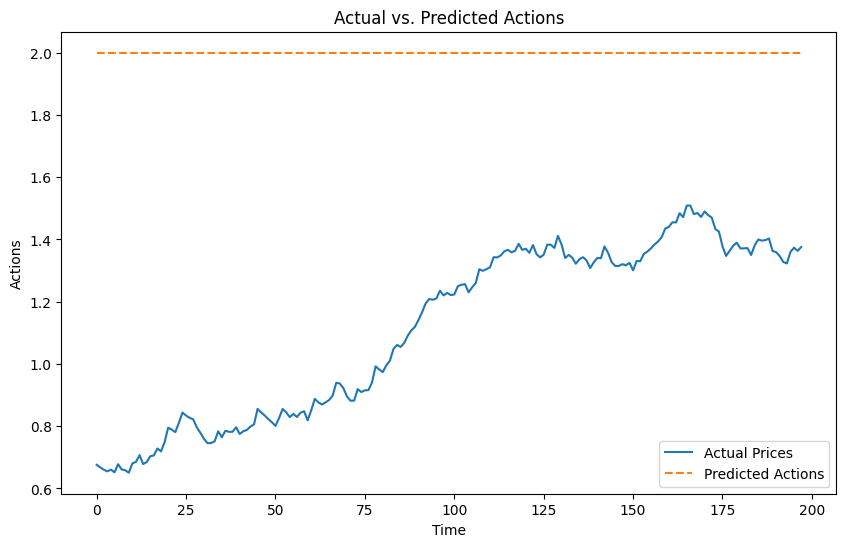

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate example data with realistic price movement
np.random.seed(42)
data_length = 1000
time_steps = 10

# Simulate price changes with some noise
price_changes = np.random.normal(0.001, 0.02, data_length)
price_changes[0] = 0  # Starting price
prices = np.cumsum(price_changes)

# Create labels for the four actions
def create_labels(data):
    labels = []
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:  # Price went up
            labels.append([0, 0, 1, 0])  # Buy
        elif data[i] < data[i - 1]:  # Price went down
            labels.append([1, 0, 0, 0])  # Sell
        else:
            labels.append([0, 1, 0, 0])  # Do not Buy/Sell
    return np.array(labels)

# Create lagged sequences
X, y = [], []
for i in range(data_length - time_steps):
    X.append(prices[i:i+time_steps])
    y.append(prices[i+time_steps])

X = np.array(X)
y = np.array(y)

# Create labels for the actions
y_labels = create_labels(y)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_labels[:train_size], y_labels[train_size:]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model with output shape for the four actions
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(4, activation='softmax'))  # Softmax activation for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
test_predictions = model.predict(X_test)

# Visualize predictions
plt.figure(figsize=(10, 6))

plt.plot(prices[train_size + time_steps:], label='Actual Prices')
plt.plot(np.argmax(test_predictions, axis=1), label='Predicted Actions', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Actions')
plt.title('Actual vs. Predicted Actions')
plt.legend()
plt.show()


Epoch 1/10
792/792 - 16s - loss: 1.0558 - accuracy: 0.5164 - 16s/epoch - 20ms/step
Epoch 2/10
792/792 - 9s - loss: 1.0292 - accuracy: 0.5240 - 9s/epoch - 12ms/step
Epoch 3/10
792/792 - 10s - loss: 1.0326 - accuracy: 0.5240 - 10s/epoch - 12ms/step
Epoch 4/10
792/792 - 14s - loss: 1.0306 - accuracy: 0.5240 - 14s/epoch - 18ms/step
Epoch 5/10
792/792 - 10s - loss: 1.0262 - accuracy: 0.5240 - 10s/epoch - 12ms/step
Epoch 6/10
792/792 - 11s - loss: 1.0289 - accuracy: 0.5240 - 11s/epoch - 13ms/step
Epoch 7/10
792/792 - 10s - loss: 1.0297 - accuracy: 0.5240 - 10s/epoch - 13ms/step
Epoch 8/10
792/792 - 9s - loss: 1.0281 - accuracy: 0.5240 - 9s/epoch - 11ms/step
Epoch 9/10
792/792 - 10s - loss: 1.0262 - accuracy: 0.5240 - 10s/epoch - 13ms/step
Epoch 10/10
792/792 - 10s - loss: 1.0267 - accuracy: 0.5240 - 10s/epoch - 13ms/step
7/7 [==============================] - 1s 8ms/step


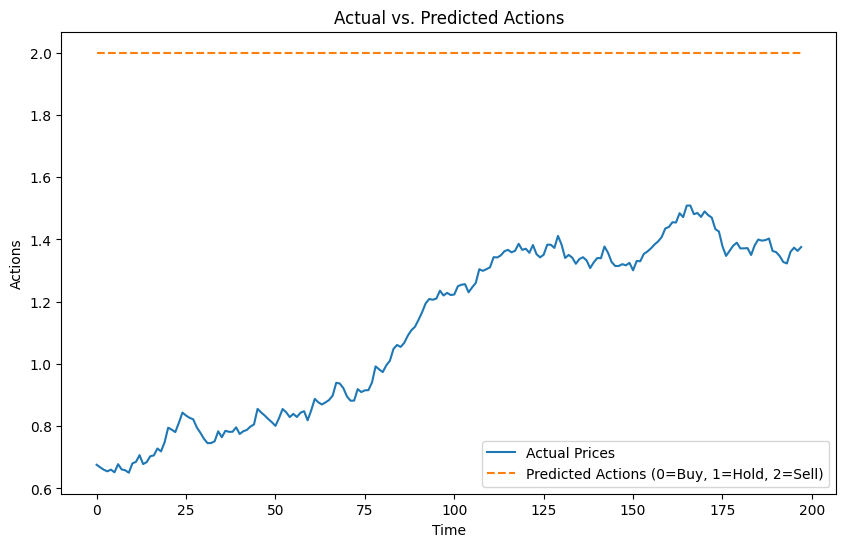

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate example data with realistic price movement
np.random.seed(42)
data_length = 10000
time_steps = 10

# Simulate price changes with some noise
price_changes = np.random.normal(0.001, 0.02, data_length)
price_changes[0] = 0  # Starting price
prices = np.cumsum(price_changes)

# Create labels for the four actions including "Sell" after "Buy"
def create_labels(data):
    labels = []
    holding = False
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:  # Price went up
            labels.append([0, 0, 1, 0])  # Buy
            holding = True
        elif data[i] < data[i - 1] and holding:  # Price went down and holding
            labels.append([0, 0, 0, 1])  # Sell
            holding = False
        else:
            labels.append([0, 1, 0, 0])  # Do not Buy/Sell
    return np.array(labels)

# Create lagged sequences
X, y = [], []
for i in range(data_length - time_steps):
    X.append(prices[i:i+time_steps])
    y.append(prices[i+time_steps])

X = np.array(X)
y = np.array(y)

# Create labels for the actions
y_labels = create_labels(y)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_labels[:train_size], y_labels[train_size:]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model with output shape for the four actions
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(25))
model.add(Dense(4, activation='softmax'))  # Softmax activation for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
test_predictions = model.predict(X_test)

# Visualize predictions
plt.figure(figsize=(10, 6))

plt.plot(prices[train_size + time_steps:], label='Actual Prices')
plt.plot(np.argmax(test_predictions, axis=1), label='Predicted Actions (0=Buy, 1=Hold, 2=Sell)', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Actions')
plt.title('Actual vs. Predicted Actions')
plt.legend()
plt.show()
